# Block the Bad Guy

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('train.csv')

df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
len(df)

159571

In [6]:
temp = df[df['obscene'] == 1]
temp.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0


## Mean length of comments

In [9]:
com_lengths = df.comment_text.str.len()
no_of_comments = len(df)

mean_length = sum(com_lengths) / no_of_comments
mean_length

394.07322132467681

## Distribution plot for different categories

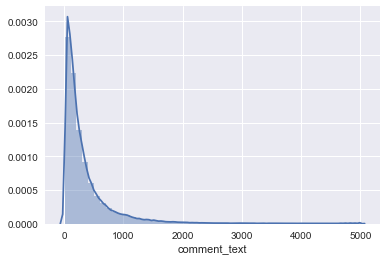

In [10]:
sns.distplot(com_lengths)

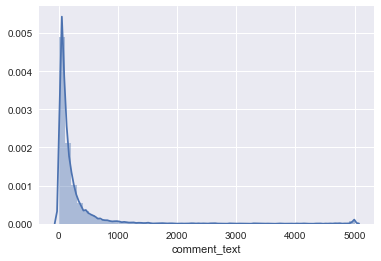

In [11]:
obscenecomments = df[df['obscene'] == 1]
ob_len = obscenecomments.comment_text.str.len()

sns.distplot(ob_len)

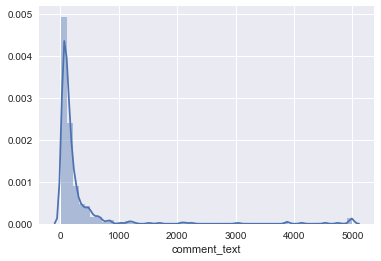

In [12]:
obscenecomments = df[df['threat'] == 1]
ob_len = obscenecomments.comment_text.str.len()

sns.distplot(ob_len)

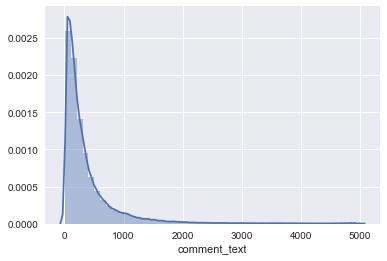

In [13]:
normal = df[(df['threat'] == 0) & (df['toxic'] == 0) & (df['severe_toxic'] == 0) & (df['insult'] == 0) & (df['obscene'] == 0) & (df['identity_hate'] == 0)]

norm_len = normal.comment_text.str.len()

sns.distplot(norm_len)

In [15]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

s = tokenize("Ajay#@&^#& Aravindh G")
s

['Ajay', '#', '@', '&', '^', '#', '&', 'Aravindh', 'G']

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [101]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "toxic.png")

## Helper function

In [1]:
def fit_logistic(x, y):
    y = y.values
    model = LogisticRegression(C=4, dual=True)
    return model.fit(x, y)

## Vectorizing the comments

In [52]:
train = pd.read_csv('train.csv')

print("Fill empty with unknown...")
train['comment_text'].fillna('unknown', inplace=True)
test['comment_text'].fillna('unknown', inplace=True)

print("Train TFIDF vectorizer...")
tfidfvectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenize,
                                  min_df=3, max_df=0.9, strip_accents='unicode',
                                  use_idf=1, smooth_idf=True, sublinear_tf=1)

train_term_doc = tfidfvectorizer.fit_transform(train['comment_text'])
x = train_term_doc


Fill empty with unknown...
Train TFIDF vectorizer...


In [182]:
x.shape

(159571, 426005)

## Training

In [54]:
import pickle
for i, j in enumerate(label_cols):
        print("Fitting:", j)
        model = fit_logistic(x, train[j])

        # joblib.dump(model, 'models/logistic_{}.pkl'.format(j))
        with open('logistic_{}.pkl'.format(j), 'wb') as lg_file:
            pickle.dump(model, lg_file)

Fitting: toxic
Fitting: severe_toxic
Fitting: obscene
Fitting: threat
Fitting: insult
Fitting: identity_hate


## Load the saved pickle files

In [55]:
with open('tfidf_vectorizer_train.pkl', 'wb') as tfidf_file:
        pickle.dump(tfidfvectorizer, tfidf_file)

In [56]:
with open('tfidf_vectorizer_train.pkl', 'rb') as tfidf_file:
        tfidf_model = pickle.load(tfidf_file)

with open('logistic_toxic.pkl', 'rb') as logistic_toxic_file:
    logistic_toxic_model = pickle.load(logistic_toxic_file)
with open('logistic_severe_toxic.pkl', 'rb') as logistic_severe_toxic_file:
    logistic_severe_toxic_model = pickle.load(logistic_severe_toxic_file)
with open('logistic_identity_hate.pkl', 'rb') as logistic_identity_hate_file:
    logistic_identity_hate_model = pickle.load(logistic_identity_hate_file)
with open('logistic_insult.pkl', 'rb') as logistic_insult_file:
    logistic_insult_model = pickle.load(logistic_insult_file)
with open('logistic_obscene.pkl', 'rb') as logistic_obscene_file:
    logistic_obscene_model = pickle.load(logistic_obscene_file)
with open('logistic_threat.pkl', 'rb') as logistic_threat_file:
    logistic_threat_model = pickle.load(logistic_threat_file)

## Prediction

In [180]:
# text = test.comment_text[0]
text = test.comment_text[0]

comment_term_doc = tfidf_model.transform([text])

dict_preds = {}

dict_preds['pred_toxic'] = logistic_toxic_model.predict_proba(comment_term_doc)[:, 1][0] * 100
dict_preds['pred_severe_toxic'] = logistic_severe_toxic_model.predict_proba(comment_term_doc)[:, 1][0] * 100
dict_preds['pred_identity_hate'] = logistic_identity_hate_model.predict_proba(comment_term_doc)[:, 1][0] * 100
dict_preds['pred_insult'] = logistic_insult_model.predict_proba(comment_term_doc)[:, 1][0] * 100
dict_preds['pred_obscene'] = logistic_obscene_model.predict_proba(comment_term_doc)[:, 1][0] * 100
dict_preds['pred_threat'] = logistic_threat_model.predict_proba(comment_term_doc)[:, 1][0] * 100

In [181]:
for i, j in dict_preds.items():
    print(i, '-------->' , j)

pred_toxic --------> 99.918374329
pred_severe_toxic --------> 13.4188278715
pred_identity_hate --------> 33.8921499908
pred_insult --------> 92.3702564149
pred_obscene --------> 99.7401621292
pred_threat --------> 3.96672542461


In [88]:
test = pd.read_csv('test.csv')

In [148]:
test.comment_text[0]

"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"

## Accuracy

In [174]:
toxic = train.comment_text

toxic_idf = tfidf_model.transform(toxic)

pred = logistic_toxic_model.predict_proba(toxic_idf)[:,1]
print(pred.shape)

(159571,)


In [175]:
pred[:2]

array([ 0.00786422,  0.0179849 ])

In [177]:
from sklearn.metrics import accuracy_score

toxic_score = accuracy_score(train.toxic, pred.round())
toxic_score

0.98140639589900425

In [ ]:
from sklearn.model_validation import train_test_split

In [178]:
X_train = x[:100000]
X_test = x[100000:]
y_train_toxic = train['toxic'][:100000]
y_test_toxic = train['toxic'][100000:]